In [1]:
import torch

In [2]:
from torch.utils.data import Dataset

In [3]:
from torchvision import datasets

In [5]:
from torchvision.transforms import ToTensor

In [6]:
import matplotlib.pyplot as plt

In [31]:
import pandas as pd

In [ ]:
#Code for processing data samples can get messy and hard to maintain; we ideally want our 
# dataset code to be decoupled from our model training code for better readability and 
# modularity. PyTorch provides two data primitives: torch.utils.data.DataLoader and 
# torch.utils.data.Dataset that allow you to use pre-loaded datasets as well as your own data. 
# Dataset stores the samples and their corresponding labels, and DataLoader wraps an iterable 
# around the Dataset to enable easy access to the samples. 

# PyTorch domain libraries provide a number of pre-loaded datasets (such as FashionMNIST) that 
# subclass torch.utils.data.Dataset and implement functions specific to the particular data. 
# They can be used to prototype and benchmark your model. You can find them here: Image Datasets, 
# Text Datasets, and Audio Datasets

In [7]:
training_data = datasets.FashionMNIST(root='data', train=True, download=True, transform=ToTensor())

In [8]:
test_data = datasets.FashionMNIST(root='data', download=True, train=False, transform=ToTensor())

In [21]:
image, label = training_data[0]

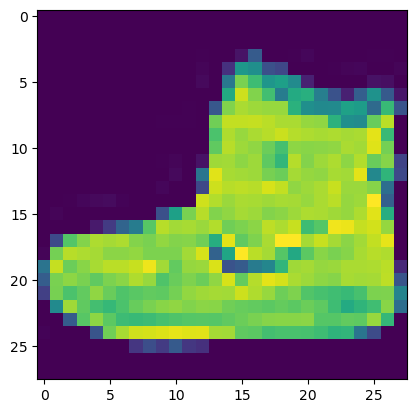

In [23]:
plt.imshow(image[0])

In [29]:
def get_key(dic, val):
    for key, value in dic.items():
        if value==val:
            break
    return key

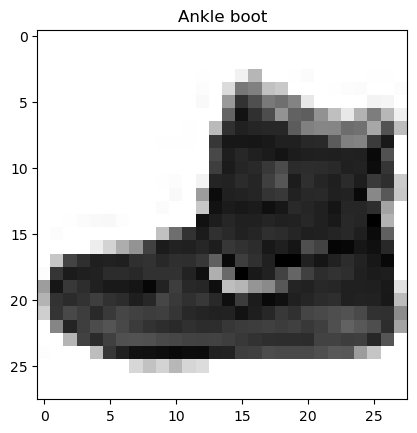

In [30]:
plt.imshow(training_data.data[0], cmap=plt.cm.binary)
plt.title(get_key(training_data.class_to_idx, training_data.targets[0]))
plt.show()

In [32]:
#A custom Dataset class must implement three functions: __init__, __len__, and __getitem__. 
# Take a look at this implementation; the FashionMNIST images are stored in a directory img_dir,
#  and their labels are stored separately in a CSV file annotations_file.
class CustomImageDataset(Dataset):

    #__init__: The __init__ function is run once when instantiating the Dataset object.
    # We initialize the directory containing the images, the annotations file, and both transforms
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform
    

    #__len__: The __len__ function returns the number of samples in our dataset.
    def __len__(self):
        return len(self.img_labels)
    

    #__getitem__: The __getitem__ function loads and returns a sample from the dataset at the 
    # given index idx. Based on the index, it identifies the image’s location on disk, converts 
    # that to a tensor using read_image, retrieves the corresponding label from the csv data in 
    # self.img_labels, calls the transform functions on them (if applicable), and returns the 
    # tensor image and corresponding label in a tuple.
    def __getitem__(self, index):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

In [33]:
# Preparing your data for training with DataLoaders

# The Dataset retrieves our dataset’s features and labels one sample at a time. 
# While training a model, we typically want to pass samples in “minibatches”, 
# reshuffle the data at every epoch to reduce model overfitting, and use Python’s 
# multiprocessing to speed up data retrieval.

# DataLoader is an iterable that abstracts this complexity for us in an easy API.

from torch.utils.data import DataLoader

In [35]:
training_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [34]:
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

In [59]:
data = next(iter(train_dataloader))

In [65]:
data[1]

tensor([3, 4, 9, 6, 3, 5, 8, 1, 4, 6, 1, 1, 0, 6, 9, 4, 4, 1, 6, 1, 9, 4, 3, 6,
        9, 8, 8, 1, 6, 3, 8, 2, 6, 5, 9, 5, 1, 8, 2, 8, 9, 3, 2, 6, 7, 5, 8, 9,
        8, 9, 8, 3, 3, 1, 8, 0, 8, 1, 6, 9, 8, 2, 0, 7])

In [69]:
train_features, train_labels = next(iter(train_dataloader))

tensor(9)

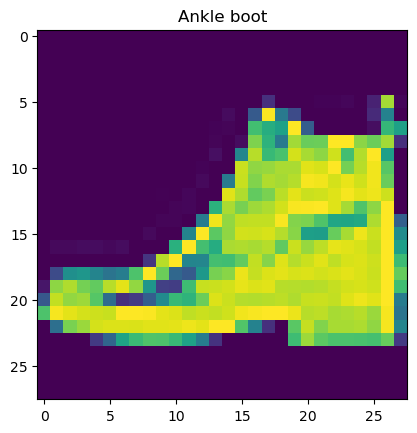

In [80]:
plt.imshow(train_features[0][0])
plt.title(get_key(training_data.class_to_idx, train_labels[0]))
plt.show()